   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 41.9 MB/s eta 0:00:00


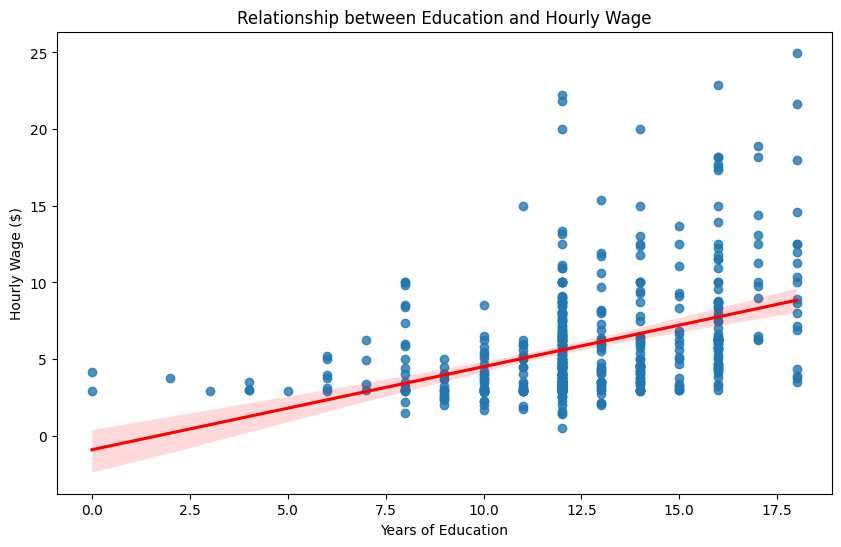

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           2.78e-22
Time:                        11:39:23   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9049      0.685     -1.321      0.1

In [1]:
# 1. Install the economics data package
!pip install wooldridge pandas statsmodels matplotlib seaborn

import wooldridge as woo
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the 'wage1' dataset (from 1976 Current Population Survey)
df = woo.data('wage1')

# 3. Create a simple chart to "see" the data
plt.figure(figsize=(10, 6))
sns.regplot(x='educ', y='wage', data=df, line_kws={"color": "red"})
plt.title('Relationship between Education and Hourly Wage')
plt.xlabel('Years of Education')
plt.ylabel('Hourly Wage ($)')
plt.show()

# 4. Run the Econometric Model (OLS)
# We are asking: Wage = intercept + slope * Education
model = smf.ols(formula='wage ~ educ', data=df).fit()

# 5. Show the results
print(model.summary())

In [2]:
# 1. Run a Multiple Regression
# we add 'exper' (experience) and 'tenure' (years at current job)
multi_model = smf.ols(formula='wage ~ educ + exper + tenure', data=df).fit()

# 2. Print the new results
print("--- Multiple Regression Results ---")
print(multi_model.summary())

# 3. Compare the 'educ' coefficient from before
print(f"\nSimple Model Education Coef: {model.params['educ']:.3f}")
print(f"Multiple Model Education Coef: {multi_model.params['educ']:.3f}")

--- Multiple Regression Results ---
                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     76.87
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           3.41e-41
Time:                        12:09:28   Log-Likelihood:                -1336.8
No. Observations:                 526   AIC:                             2682.
Df Residuals:                     522   BIC:                             2699.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2

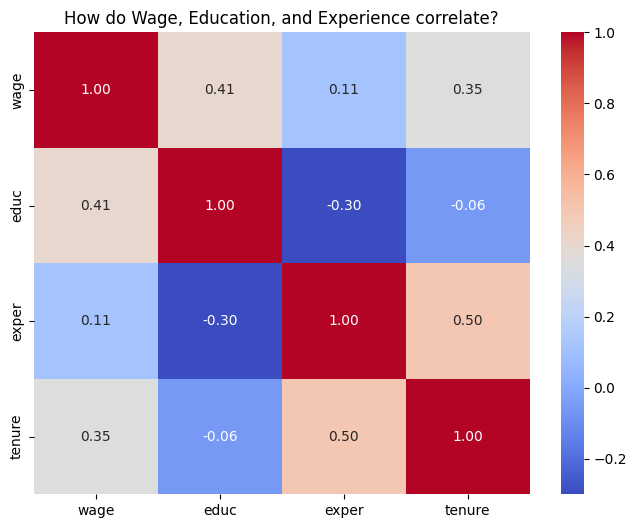

In [3]:
# Create a correlation matrix to see how variables move together
corr_matrix = df[['wage', 'educ', 'exper', 'tenure']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('How do Wage, Education, and Experience correlate?')
plt.show()